<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Exploratory Data Analysis

1. View your dataset
2. Describe dataset
3. Clean data(missing values,dubicate data,etc.)
4. Feature Scaling(Standardization,Normalization)
5. Encoding(one-hot encoding,Label encoding)
6. Outlier handling
7. Calculate and Visualize relationships.



# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df= pd.read_csv('/content/data_clean.csv')
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


# Describing dataset

In [3]:
# Check for missing values
df.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [5]:
# Get summary statistics of numerical columns
df.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,158.000000,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,79.500000,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,45.754781,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,40.250000,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,79.500000,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,118.750000,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


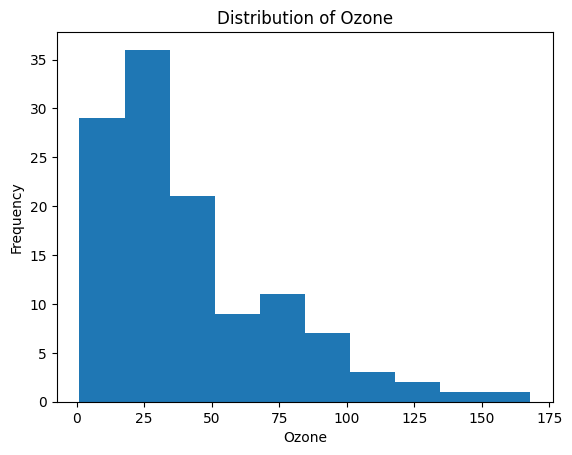

In [6]:
# Visualize the distribution of a numerical variable (e.g., Ozone)

plt.hist(df['Ozone'])
plt.xlabel('Ozone')
plt.ylabel('Frequency')
plt.title('Distribution of Ozone')
plt.show()


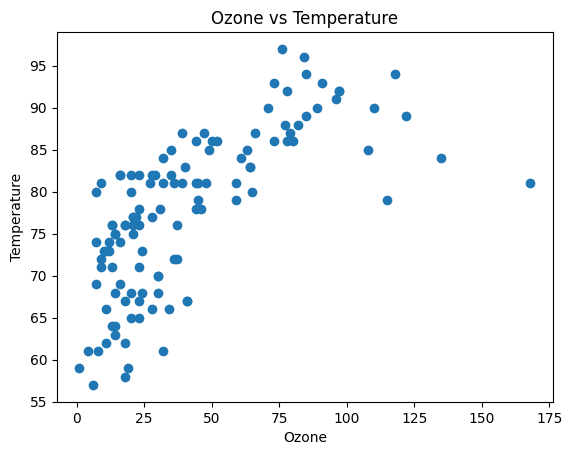

In [7]:
# Explore the relationship between two variables (e.g., Ozone and Temp)
plt.scatter(df['Ozone'], df['Temp'])
plt.xlabel('Ozone')
plt.ylabel('Temperature')
plt.title('Ozone vs Temperature')
plt.show()

# Data Cleaning

Dropping unnecessary column

In [8]:
#To drop first column 'Temp C' from data
df.drop('Temp C',axis=1,inplace=True)
df

,Unnamed: 0,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,5,1,2010,67,S
1,2,36.0,118.0,8.0,5,2,2010,72,C
2,3,12.0,149.0,12.6,5,3,2010,74,PS
3,4,18.0,313.0,11.5,5,4,2010,62,S
4,5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,5,1,2010,67,C
154,155,30.0,193.0,6.9,9,26,2010,70,PS
155,156,NaN,145.0,13.2,9,27,2010,77,S
156,157,14.0,191.0,14.3,9,28,2010,75,S


In [9]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,5,1,2010,67,S
1,2,36.0,118.0,8.0,5,2,2010,72,C
2,3,12.0,149.0,12.6,5,3,2010,74,PS
3,4,18.0,313.0,11.5,5,4,2010,62,S
4,5,NaN,NaN,14.3,5,5,2010,56,S


In [10]:
df.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,5,1,2010,67,C
154,155,30.0,193.0,6.9,9,26,2010,70,PS
155,156,NaN,145.0,13.2,9,27,2010,77,S
156,157,14.0,191.0,14.3,9,28,2010,75,S
157,158,18.0,131.0,8.0,9,29,2010,76,C


In [11]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

converting into numerical representation

In [12]:
#errors=coerce will introduce NA values for non numeric data in the columns
#convert month column to numeric

df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

In [13]:
df['Month'].unique()

array([ 5., nan,  6.,  7.,  8.,  9.])

Renaming columns

In [14]:
#Renaming the column
df = df.rename(columns={'Solar.R':'Solar', 'Unnamed: 0':'Index'})
df.head()

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,5.0,5,2010,56,S


Handling missing values

In [15]:
#count of missing values
df.isna().sum()

Index       0
Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [16]:
#Percent of missing values
#(miss/total)*100
(df.isna().sum())/(len(df)) * 100

Index       0.000000
Ozone      24.050633
Solar       4.430380
Wind        0.000000
Month       0.632911
Day         0.000000
Year        0.000000
Temp        0.000000
Weather     1.898734
dtype: float64

In [17]:
#Handling missing values
#fillna()

<Axes: xlabel='Ozone', ylabel='Count'>

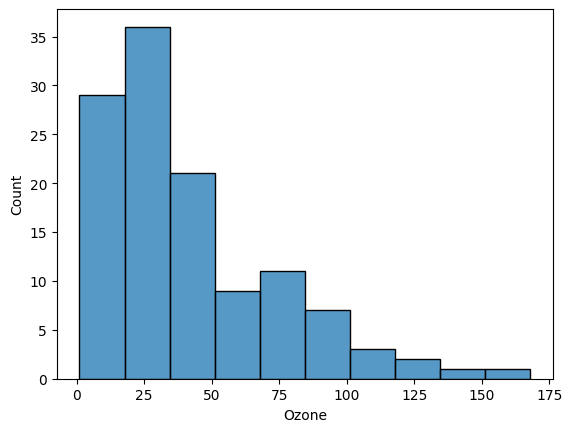

In [18]:
sns.histplot(df['Ozone'])

In [19]:
df['Ozone'].skew()

1.282000297366739

In [20]:
df['Ozone'].kurt()

1.4264818805486854

In [21]:
df["Ozone"].fillna(df["Ozone"].median(),inplace=True)

In [22]:
df['Ozone'].isna().sum()

0

<ipython-input-23-84d5132a32d2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Solar'])


<Axes: xlabel='Solar', ylabel='Density'>

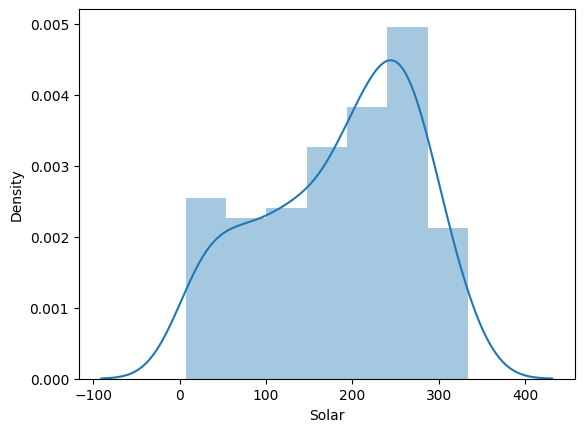

In [23]:
sns.distplot(df['Solar'])

In [24]:
df["Solar"].fillna(df["Solar"].mean(),inplace=True)

In [25]:
df['Solar'].isna().sum()

0

In [26]:
df['Month'].unique()

array([ 5., nan,  6.,  7.,  8.,  9.])

In [27]:
df['Month'].fillna(df['Month'].mode()[0],inplace=True)

In [28]:
df['Weather'].fillna(df['Weather'].mode()[0],inplace=True)

In [29]:
df.isna().sum()

Index      0
Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

# Encoding

In [30]:
df.head()

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.000000,7.4,5.0,1,2010,67,S
1,2,36.0,118.000000,8.0,5.0,2,2010,72,C
2,3,12.0,149.000000,12.6,5.0,3,2010,74,PS
3,4,18.0,313.000000,11.5,5.0,4,2010,62,S
4,5,30.5,185.403974,14.3,5.0,5,2010,56,S


In [31]:
df['Weather'].unique()

array(['S', 'C', 'PS'], dtype=object)

In [32]:
df1 = df.copy()
#df  -> one-hot encoding
#df1 -> label encoding

One-Hot encoding

In [33]:
ohe = pd.get_dummies(df['Weather'])

In [34]:
ohe

,C,PS,S
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,True
...,...,...,...
153,True,False,False
154,False,True,False
155,False,False,True
156,False,False,True


In [35]:
ohe.replace({False: 0, True: 1},inplace=True)
# Replace False with 0 and True with 1 in the entire DataFrame.

In [36]:
ohe

,C,PS,S
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
153,1,0,0
154,0,1,0
155,0,0,1
156,0,0,1


In [37]:
df = pd.concat([df,ohe],axis=1)

In [38]:
df

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,C,PS,S
0,1,41.0,190.000000,7.4,5.0,1,2010,67,S,0,0,1
1,2,36.0,118.000000,8.0,5.0,2,2010,72,C,1,0,0
2,3,12.0,149.000000,12.6,5.0,3,2010,74,PS,0,1,0
3,4,18.0,313.000000,11.5,5.0,4,2010,62,S,0,0,1
4,5,30.5,185.403974,14.3,5.0,5,2010,56,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.000000,7.4,5.0,1,2010,67,C,1,0,0
154,155,30.0,193.000000,6.9,9.0,26,2010,70,PS,0,1,0
155,156,30.5,145.000000,13.2,9.0,27,2010,77,S,0,0,1
156,157,14.0,191.000000,14.3,9.0,28,2010,75,S,0,0,1


Label encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
df1['Weather'] = le.fit_transform(df1['Weather'])

In [42]:
df1

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,1,41.0,190.000000,7.4,5.0,1,2010,67,2
1,2,36.0,118.000000,8.0,5.0,2,2010,72,0
2,3,12.0,149.000000,12.6,5.0,3,2010,74,1
3,4,18.0,313.000000,11.5,5.0,4,2010,62,2
4,5,30.5,185.403974,14.3,5.0,5,2010,56,2
...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.000000,7.4,5.0,1,2010,67,0
154,155,30.0,193.000000,6.9,9.0,26,2010,70,1
155,156,30.5,145.000000,13.2,9.0,27,2010,77,2
156,157,14.0,191.000000,14.3,9.0,28,2010,75,2


# Feature Scaling

Standard Scaler : Standardization

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss = StandardScaler()

In [45]:
df[['Ozone','Solar','Wind','Temp']] = ss.fit_transform(df[['Ozone','Solar','Wind','Temp']])

In [46]:
df

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,C,PS,S
0,1,0.072545,0.053165,-0.730714,5.0,1,2010,-1.147590,S,0,0,1
1,2,-0.101651,-0.779707,-0.559292,5.0,2,2010,-0.612725,C,1,0,0
2,3,-0.937787,-0.421109,0.754944,5.0,3,2010,-0.398779,PS,0,1,0
3,4,-0.728753,1.475990,0.440671,5.0,4,2010,-1.682455,S,0,0,1
4,5,-0.293265,0.000000,1.240640,5.0,5,2010,-2.324293,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,0.072545,0.053165,-0.730714,5.0,1,2010,-1.147590,C,1,0,0
154,155,-0.310685,0.087868,-0.873566,9.0,26,2010,-0.826671,PS,0,1,0
155,156,-0.293265,-0.467380,0.926367,9.0,27,2010,-0.077860,S,0,0,1
156,157,-0.868109,0.064733,1.240640,9.0,28,2010,-0.291806,S,0,0,1


MinMax scaler : Normalization

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
ms = MinMaxScaler()

In [49]:
df1[['Ozone','Solar','Wind','Temp']] = ms.fit_transform(df1[['Ozone','Solar','Wind','Temp']])

In [50]:
df1

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,1,0.239521,0.559633,0.300000,5.0,1,2010,0.268293,2
1,2,0.209581,0.339450,0.331579,5.0,2,2010,0.390244,0
2,3,0.065868,0.434251,0.573684,5.0,3,2010,0.439024,1
3,4,0.101796,0.935780,0.515789,5.0,4,2010,0.146341,2
4,5,0.176647,0.545578,0.663158,5.0,5,2010,0.000000,2
...,...,...,...,...,...,...,...,...,...
153,154,0.239521,0.559633,0.300000,5.0,1,2010,0.268293,0
154,155,0.173653,0.568807,0.273684,9.0,26,2010,0.341463,1
155,156,0.176647,0.422018,0.605263,9.0,27,2010,0.512195,2
156,157,0.077844,0.562691,0.663158,9.0,28,2010,0.463415,2


# Outliers handling

<Axes: ylabel='Ozone'>

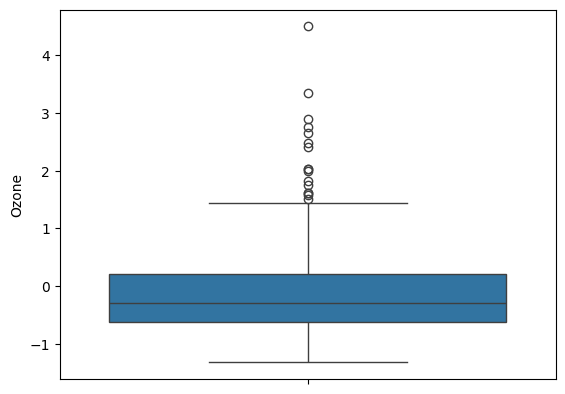

In [51]:
sns.boxplot(df['Ozone'])

<Axes: ylabel='Solar'>

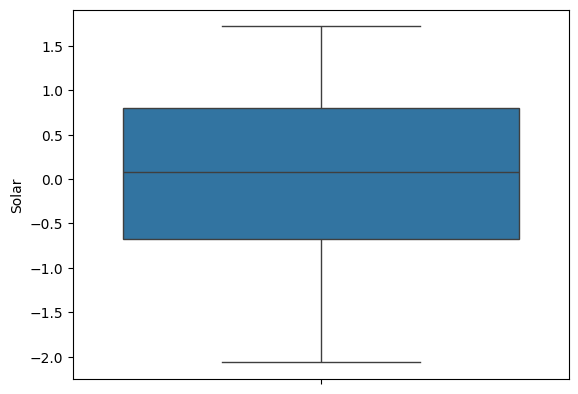

In [52]:
sns.boxplot(df['Solar'])

<Axes: ylabel='Wind'>

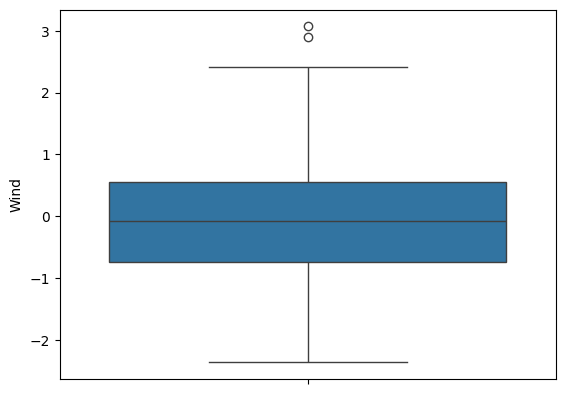

In [53]:
sns.boxplot(df['Wind'])

<Axes: ylabel='Temp'>

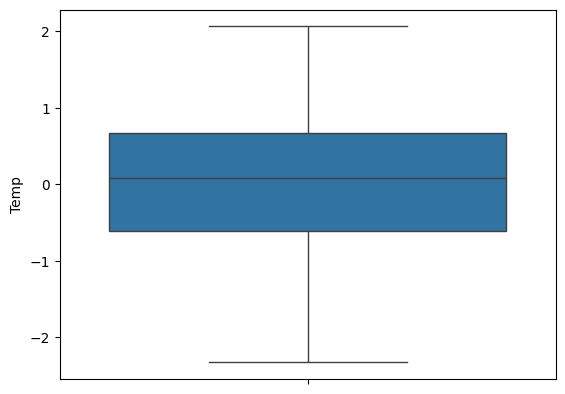

In [54]:
sns.boxplot(df['Temp'])

In [ ]:
#'Ozone' & 'Wind' columns have outliers

capping of outliers

In [55]:
#IQR handling for ozone

q1 = np.percentile(df['Ozone'],25)
q3 = np.percentile(df['Ozone'],75)

iqr = q3-q1

lb = q1-1.5*iqr   #lower bound
ub = q3+1.5*iqr   #upper bound

In [56]:
df[df['Ozone']>ub]

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,C,PS,S
29,30,2.650631,0.434899,-1.216410,5.0,30,2010,0.136086,C,1,0,0
61,62,3.347411,0.967012,-1.673535,7.0,1,2010,0.670951,S,0,0,1
68,69,2.023529,0.943877,-1.044988,7.0,8,2010,1.526735,PS,0,1,0
69,70,2.023529,1.001715,-1.216410,7.0,9,2010,1.526735,C,1,0,0
70,71,1.605461,-0.120350,-0.730714,7.0,10,2010,1.205816,PS,0,1,0
85,86,2.406758,0.434899,-0.559292,7.0,25,2010,0.777924,PS,0,1,0
88,89,1.500944,0.319222,-0.730714,7.0,28,2010,1.098843,S,0,0,1
98,99,2.894504,0.805064,-1.702106,8.0,7,2010,1.205816,C,1,0,0
99,100,1.744817,0.504305,0.097826,8.0,8,2010,1.312789,PS,0,1,0
100,101,2.476436,0.249816,-0.559292,8.0,9,2010,1.312789,C,1,0,0


In [57]:
#capping
df['Ozone'][df['Ozone']>ub] = ub
df['Ozone'][df['Ozone']<lb] = lb

<ipython-input-57-114431d27d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ozone'][df['Ozone']>ub] = ub
<ipython-input-57-114431d27d39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ozone'][df['Ozone']<lb] = lb


<Axes: ylabel='Ozone'>

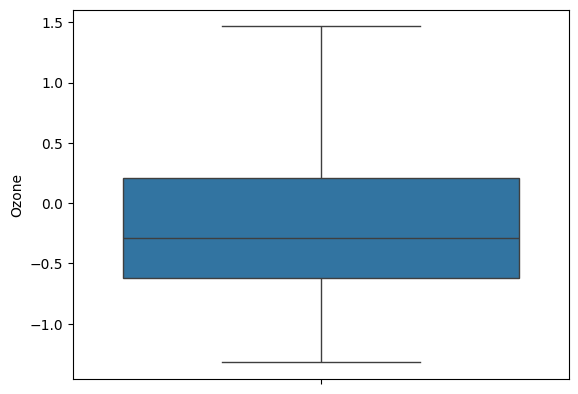

In [61]:
sns.boxplot(df['Ozone'])

In [58]:
#IQR handling for 'Wind'

q1 = np.percentile(df['Wind'],25)
q3 = np.percentile(df['Wind'],75)

iqr = q3-q1

lb = q1-1.5*iqr   #lower bound
ub = q3+1.5*iqr   #upper bound

In [59]:
df[df['Wind']>ub]

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,C,PS,S
8,9,-1.077143,-1.924908,2.897721,5.0,9,2010,-1.789428,PS,0,1,0
47,48,-0.066812,1.140527,3.069143,6.0,17,2010,-0.612725,C,1,0,0


In [60]:
#capping
df['Wind'][df['Wind']>ub] = ub
df['Wind'][df['Wind']<lb] = lb

<ipython-input-60-83854382fd53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind'][df['Wind']>ub] = ub
<ipython-input-60-83854382fd53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind'][df['Wind']<lb] = lb


<Axes: ylabel='Wind'>

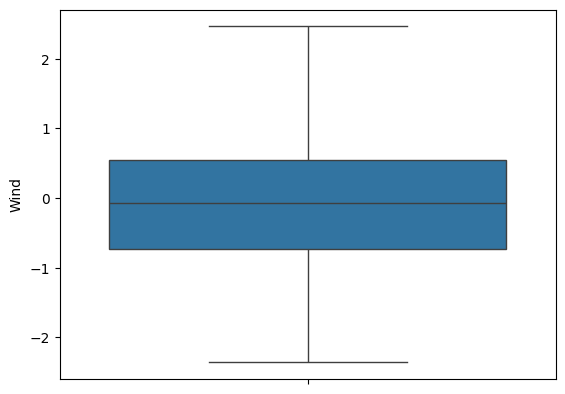

In [62]:
sns.boxplot(df['Wind'])

Removing outliers

In [64]:
q1 = np.percentile(df1['Ozone'],25)
q3 = np.percentile(df1['Ozone'],75)

iqr = q3-q1

lb = q1-1.5*iqr   #lower bound
ub = q3+1.5*iqr   #upper bound

In [65]:
new_df = df1[df1['Ozone'] < ub]

In [66]:
len(new_df)

142

<Axes: ylabel='Ozone'>

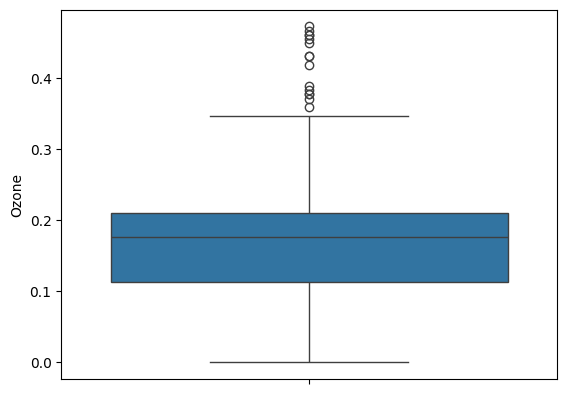

In [67]:
sns.boxplot(new_df['Ozone'])

# Relationships & Visualization

In [68]:
df.head()

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,C,PS,S
0,1,0.072545,0.053165,-0.730714,5.0,1,2010,-1.147590,S,0,0,1
1,2,-0.101651,-0.779707,-0.559292,5.0,2,2010,-0.612725,C,1,0,0
2,3,-0.937787,-0.421109,0.754944,5.0,3,2010,-0.398779,PS,0,1,0
3,4,-0.728753,1.475990,0.440671,5.0,4,2010,-1.682455,S,0,0,1
4,5,-0.293265,0.000000,1.240640,5.0,5,2010,-2.324293,S,0,0,1


<Axes: xlabel='Month', ylabel='count'>

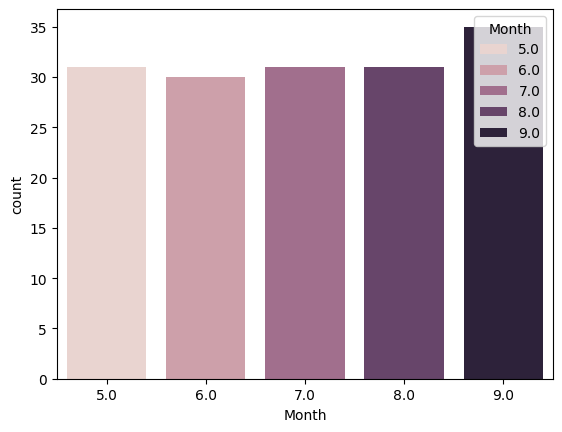

In [73]:
sns.countplot(x='Month',data=df,hue='Month')

In [69]:
df['Month'].value_counts()

Month
9.0    35
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64

In [71]:
df['Year'].value_counts()

Year
2010    158
Name: count, dtype: int64

In [74]:
df2 = df['Month'].value_counts().rename_axis('Month').reset_index(name='Counts')

In [75]:
df2

,Month,Counts
0,9.0,35
1,5.0,31
2,7.0,31
3,8.0,31
4,6.0,30


<Axes: xlabel='Month', ylabel='Counts'>

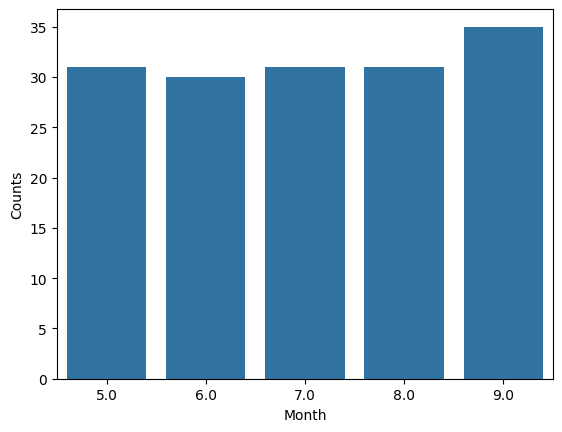

In [76]:
sns.barplot(x='Month',y='Counts',data=df2)

([<matplotlib.patches.Wedge at 0x7bde41627b80>,
 [Text(0.8442089221909705, 0.7052030173596536, '9.0'),
  Text(-0.465981098248085, 0.9964244156359823, '5.0'),
  Text(-1.0945683616281656, -0.10917921836427298, '7.0'),
  Text(-0.25997884501765883, -1.0688362831338036, '8.0'),
  Text(0.9100344464162762, -0.6179298555142176, '6.0')])

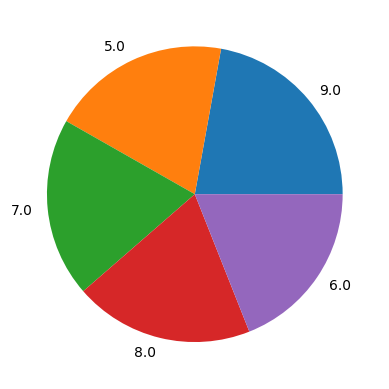

In [77]:
#Piechart
plt.pie(df2['Counts'],labels=df2['Month'])

In [78]:
df_new = pd.read_csv('/content/data_clean.csv')

In [81]:
! pip install sweetviz   #for Descriptive stat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 35.2 MB/s eta 0:00:00


In [82]:
import sweetviz as sv

In [83]:
sv_report = sv.analyze(df_new)

                                             |          | [  0%]   00:00 -> (? left)

In [84]:
sv_report.show_html("EDA_Report.html")

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [87]:
df.head()

,Index,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,C,PS,S
0,1,0.072545,0.053165,-0.730714,5.0,1,2010,-1.147590,S,0,0,1
1,2,-0.101651,-0.779707,-0.559292,5.0,2,2010,-0.612725,C,1,0,0
2,3,-0.937787,-0.421109,0.754944,5.0,3,2010,-0.398779,PS,0,1,0
3,4,-0.728753,1.475990,0.440671,5.0,4,2010,-1.682455,S,0,0,1
4,5,-0.293265,0.000000,1.240640,5.0,5,2010,-2.324293,S,0,0,1


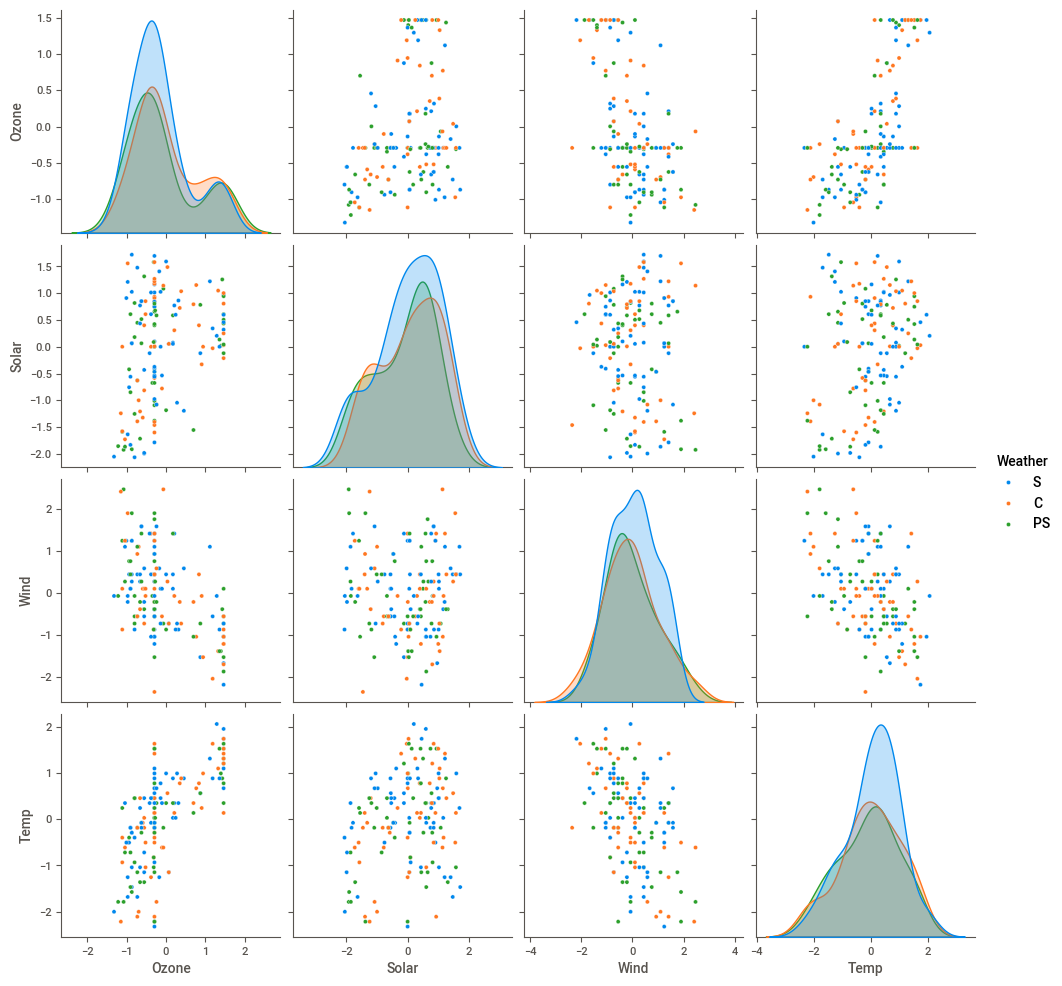

In [88]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df, vars=["Ozone", "Solar", "Wind", "Temp"], hue="Weather")
plt.show()

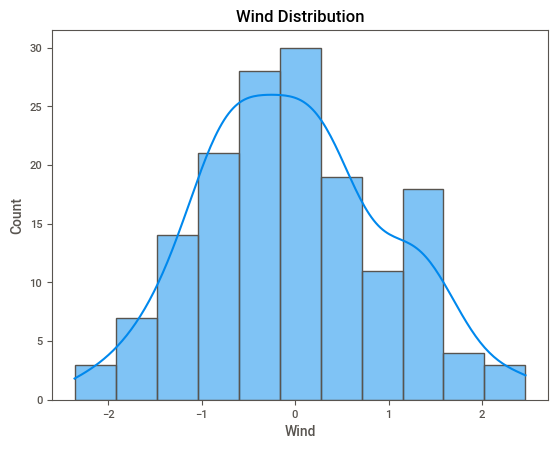

In [91]:
# Histogram for Wind distribution
sns.histplot(df['Wind'], kde=True)
plt.title('Wind Distribution')
plt.show()